In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split ,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score ,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection  import cross_val_score,KFold,StratifiedKFold

In [3]:
df_test=pd.read_csv('/content/test.csv')
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
df_train=pd.read_csv('/content/train.csv')
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
df=pd.concat([df_train,df_test])
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [6]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
old_type=df['Customer Type']
old_type

,Customer Type
0,Loyal Customer
1,disloyal Customer
2,Loyal Customer
3,Loyal Customer
4,Loyal Customer
...,...
25971,disloyal Customer
25972,Loyal Customer
25973,Loyal Customer
25974,Loyal Customer


In [8]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [9]:
df.duplicated().sum()

0

#Encoding

In [10]:
print(df['Gender'].unique())
print(df['satisfaction'].unique())
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())

['Male' 'Female']
['neutral or dissatisfied' 'satisfied']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']


In [11]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['satisfaction']=encoder.fit_transform(df['satisfaction'])
df['Type of Travel']=encoder.fit_transform(df['Type of Travel'])
df['Class']=encoder.fit_transform(df['Class'])
df['Customer Type']=encoder.fit_transform(df['Customer Type'])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,1,0,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


#Visualization

In [12]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

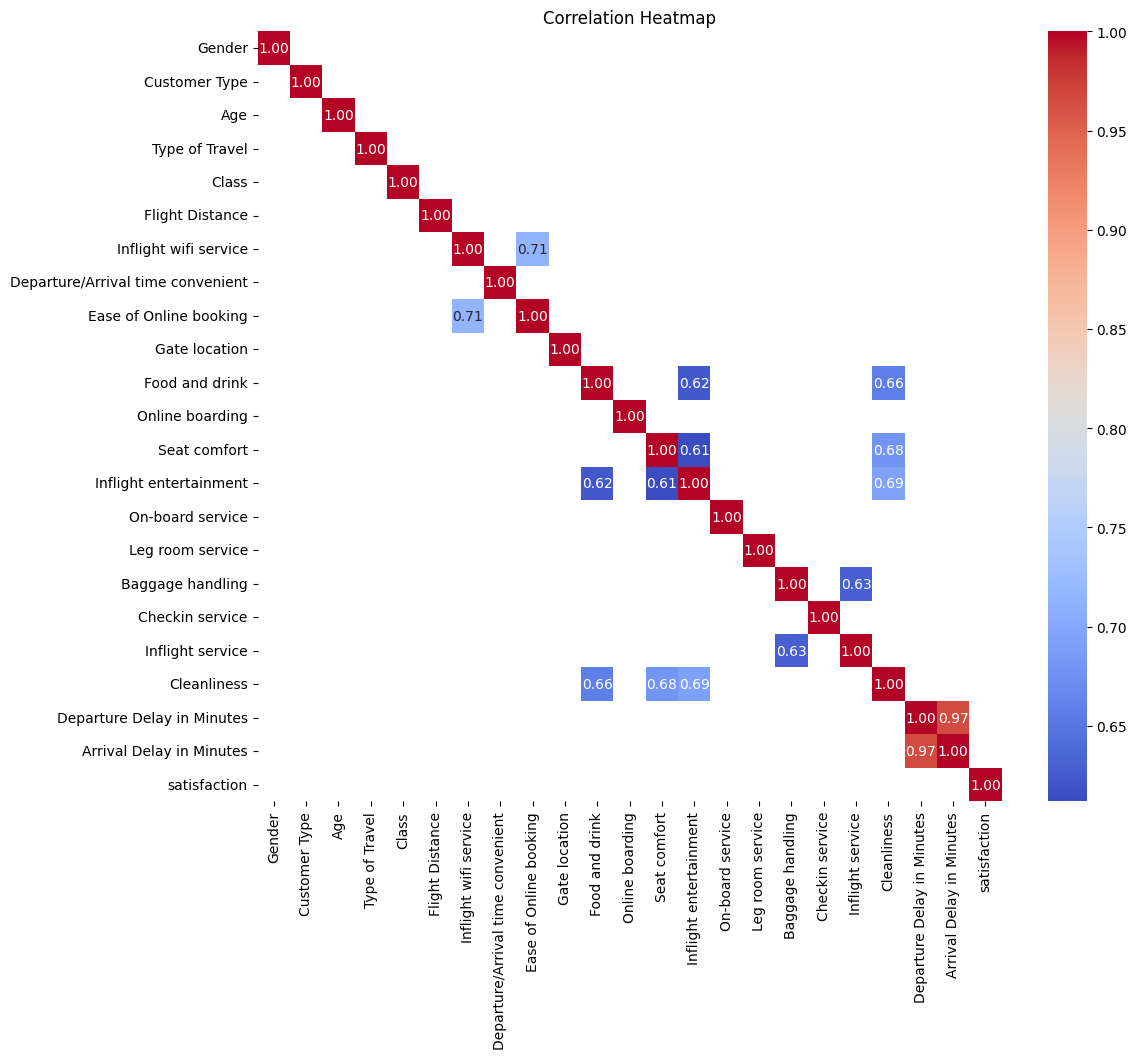

In [13]:
corr_data = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f',mask=corr_data<.6)
plt.title('Correlation Heatmap')
plt.show()
#from this graph:
#	Departure Delay in Minutes and Arrival Delay in Minutes have high correlation
#Inflight wifi service and Ease of Online booking have high corr
#cleanliness has high corr with Inflight entertainment , Food and drink and Seat comfort

In [14]:
df.drop(['Arrival Delay in Minutes','Ease of Online booking','Cleanliness'],axis=1,inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,1,5,3,5,5,4,3,4,4,5,25,0
1,1,1,25,0,0,235,3,2,3,1,3,1,1,1,5,3,1,4,1,0
2,0,0,26,0,0,1142,2,2,2,5,5,5,5,4,3,4,4,4,0,1
3,0,0,25,0,0,562,2,5,5,2,2,2,2,2,5,3,1,4,11,0
4,1,0,61,0,0,214,3,3,3,4,5,5,3,3,4,4,3,3,0,1


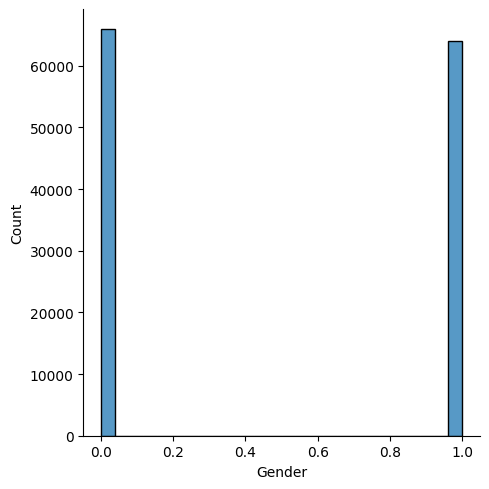

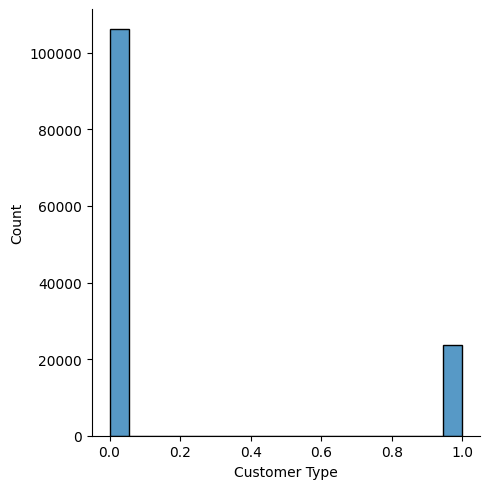

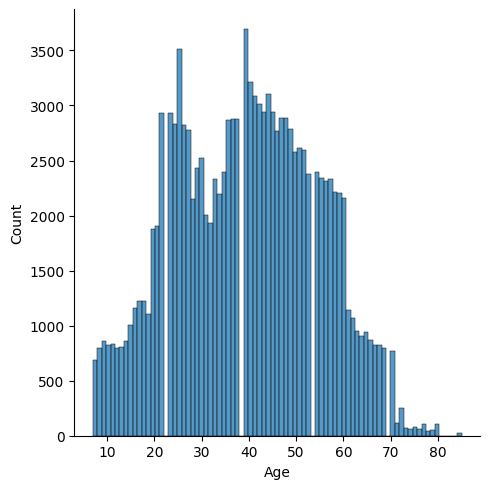

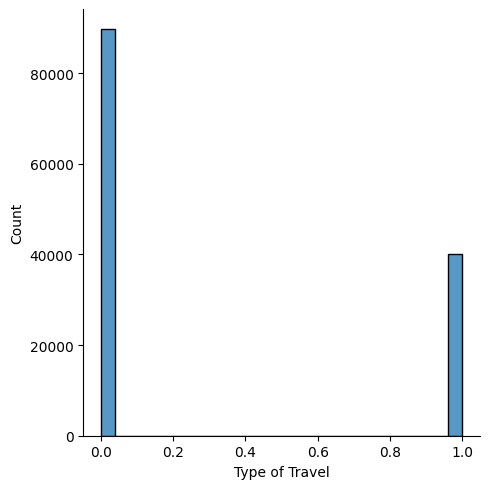

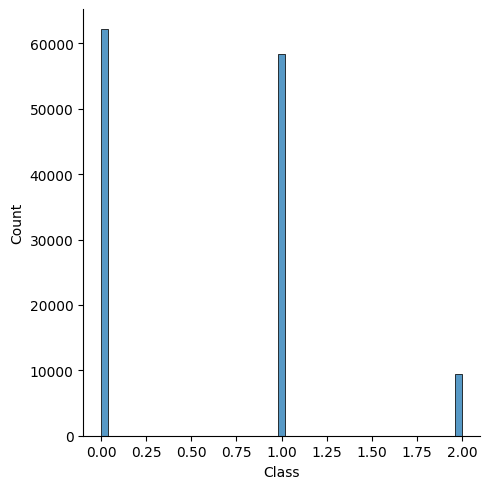

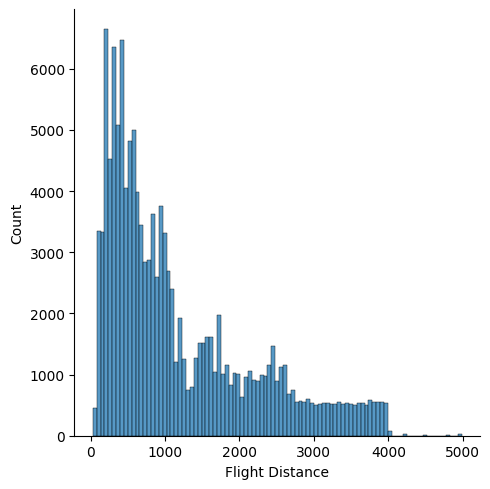

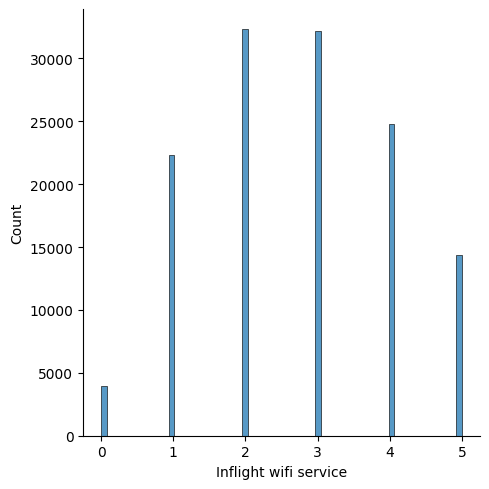

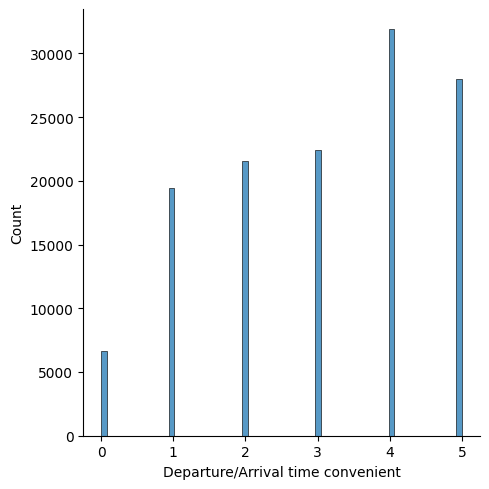

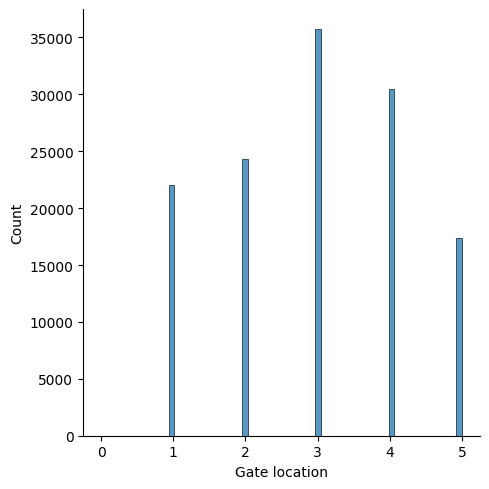

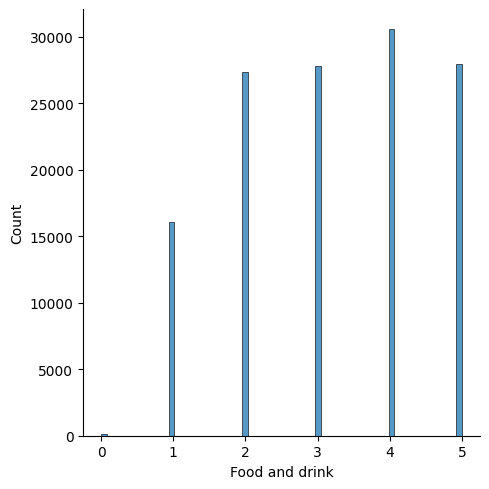

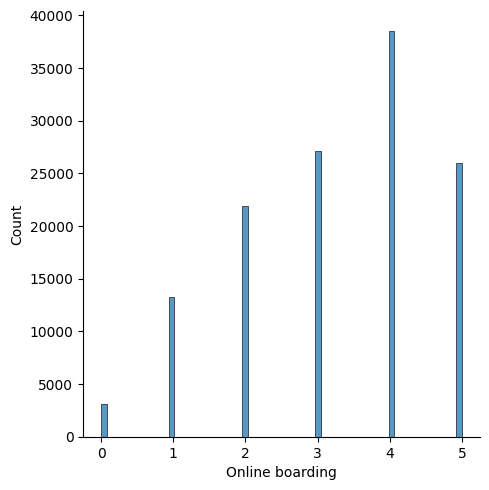

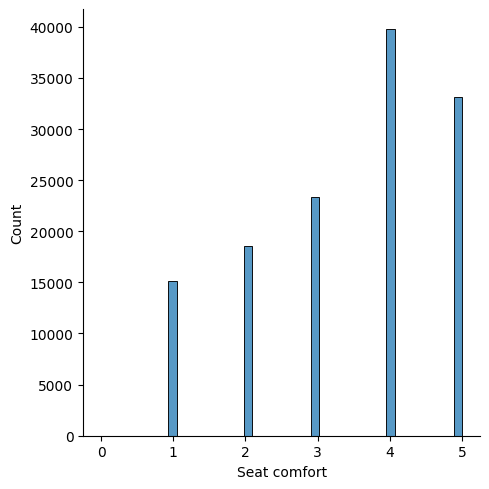

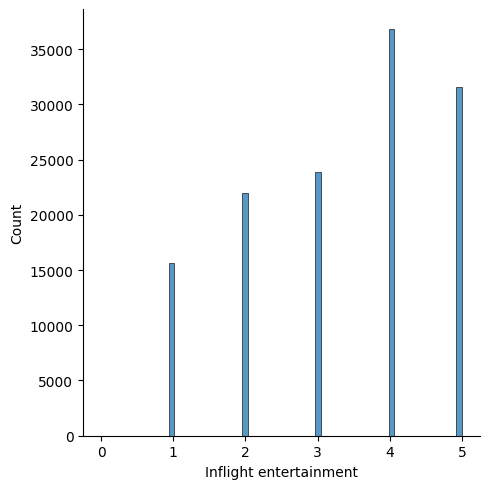

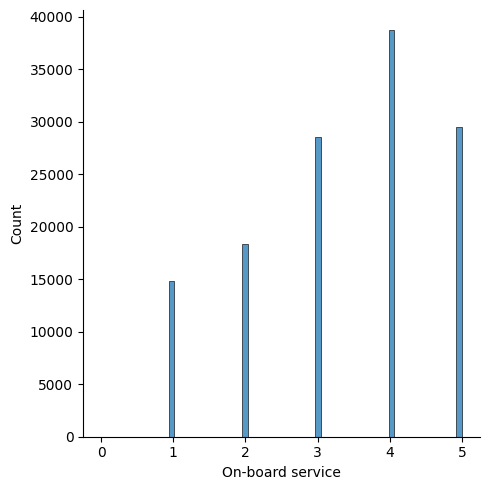

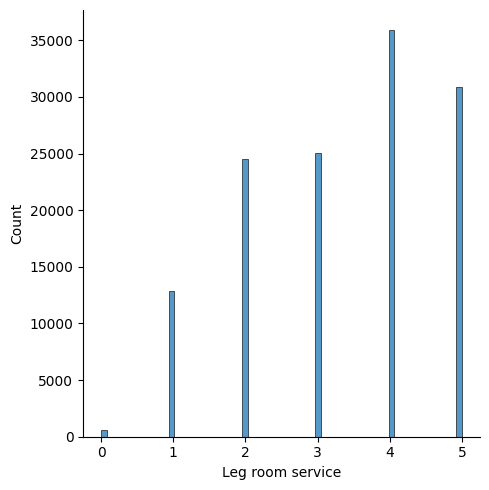

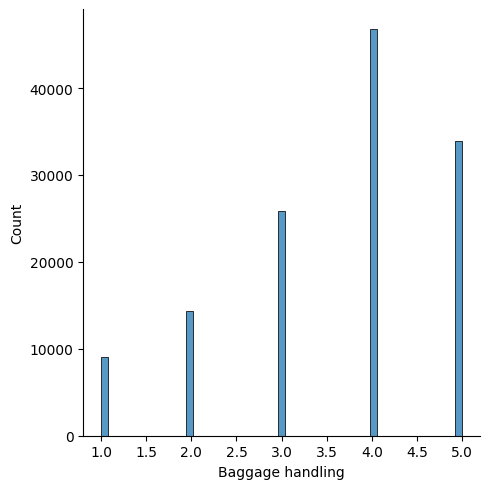

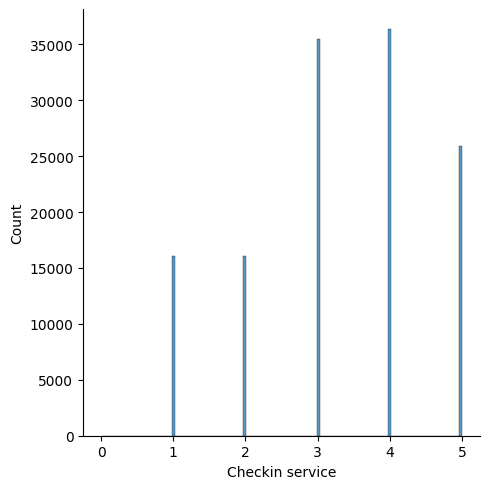

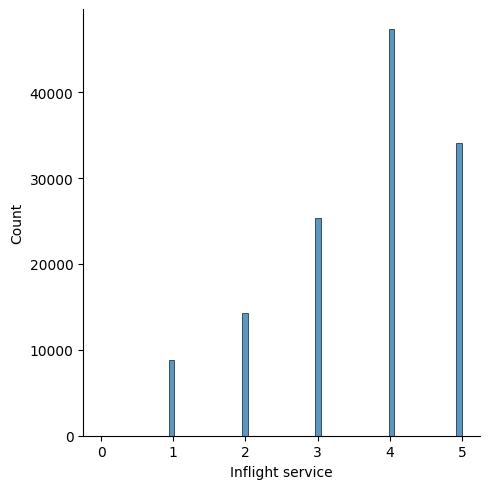

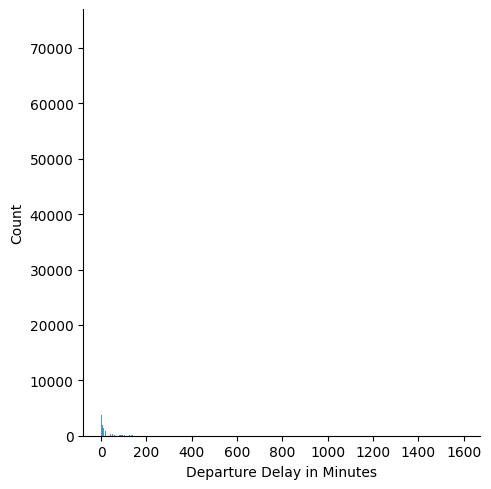

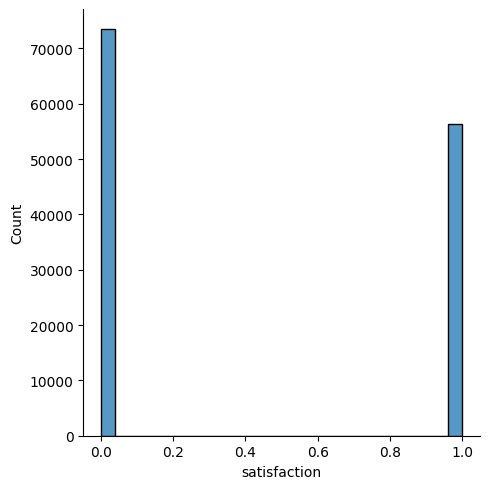

In [15]:
for col in df:
  sns.displot(df[col])

<Axes: xlabel='Age', ylabel='Count'>

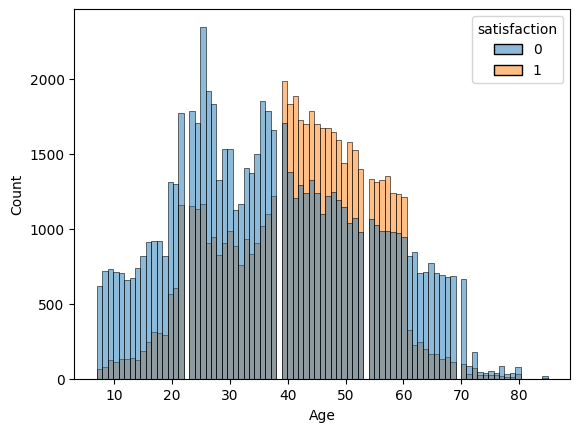

In [16]:
sns.histplot(x='Age',hue='satisfaction',multiple='layer', data=df)
#the most people satisfied from 40 to 60

<Axes: xlabel='Flight Distance', ylabel='Count'>

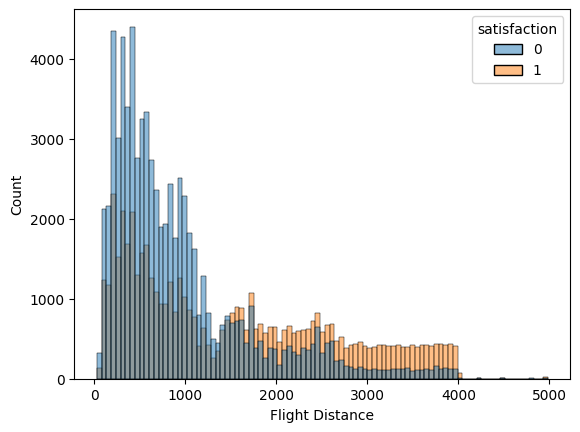

In [17]:
sns.histplot(x='Flight Distance',hue='satisfaction',multiple='layer', data=df)
#when distance grow,people will be more satistfied

<ipython-input-18-f013f04a3d48>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Class'] == 0], x='Age', label='Business', shade=True)
<ipython-input-18-f013f04a3d48>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Class'] == 1], x='Age', label='ECO', shade=True)
<ipython-input-18-f013f04a3d48>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Class'] == 2], x='Age', label='ECO PLUS', shade=True)


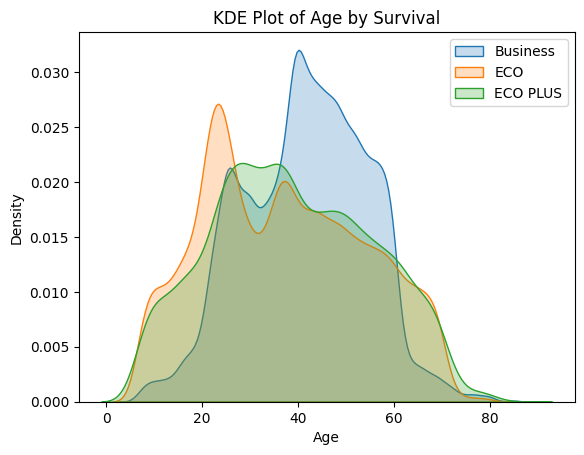

In [18]:
sns.kdeplot(data=df[df['Class'] == 0], x='Age', label='Business', shade=True)
sns.kdeplot(data=df[df['Class'] == 1], x='Age', label='ECO', shade=True)
sns.kdeplot(data=df[df['Class'] == 2], x='Age', label='ECO PLUS', shade=True)
plt.title('KDE Plot of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
#aktr a3mr bet4trk fe Eco mn 10 le 20 sana
#aktr a3mr bet4trk fe ECO Plus 25 le 40 sana
# aktr a3mr bet4trk fe buss mn 40 le 62 sana

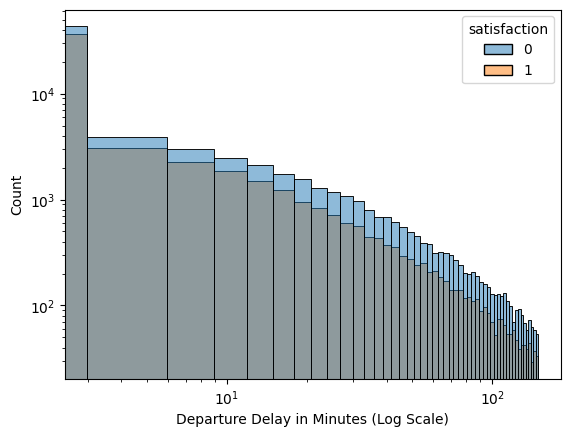

In [19]:
filtered_data = df[df['Departure Delay in Minutes'] < 150]

sns.histplot(x='Departure Delay in Minutes', hue='satisfaction', multiple='layer', data=filtered_data, bins=50)
plt.xscale('log')  # Logarithmic scale on x-axis (for large delays)
plt.yscale('log')  # Optional: Logarithmic scale on y-axis (if needed)
plt.xlabel('Departure Delay in Minutes (Log Scale)')
plt.ylabel('Count')
plt.show()
#en kol ma be7sal delay aktr fe mo8dra tab3n elnas betkon madei2a aktr

<Axes: xlabel='Age', ylabel='Count'>

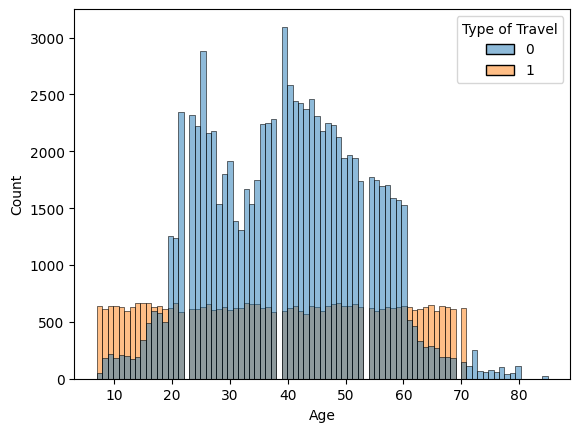

In [20]:
sns.histplot(x='Age',hue='Type of Travel',multiple='layer', data=df)
#en aktr a3mr ely betsfr bussniess betb2a mn 20 le 60 sana
#en aktr a3mr betsfr personal betb2a mn 10 le 20 w mn 60 le 70 sana

<Axes: xlabel='Age', ylabel='Count'>

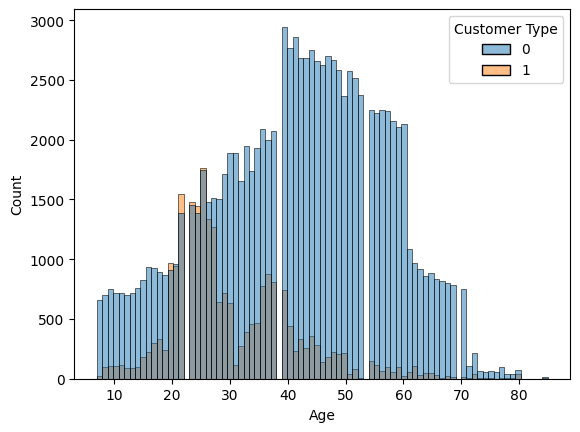

In [21]:
sns.histplot(x='Age',hue='Customer Type',multiple='layer', data=df)
#a8lbet a3mr betb2a loyal
#ely m4 loyal mn 20 masln le 25

In [22]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Departure Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [23]:
len(df.columns)

20

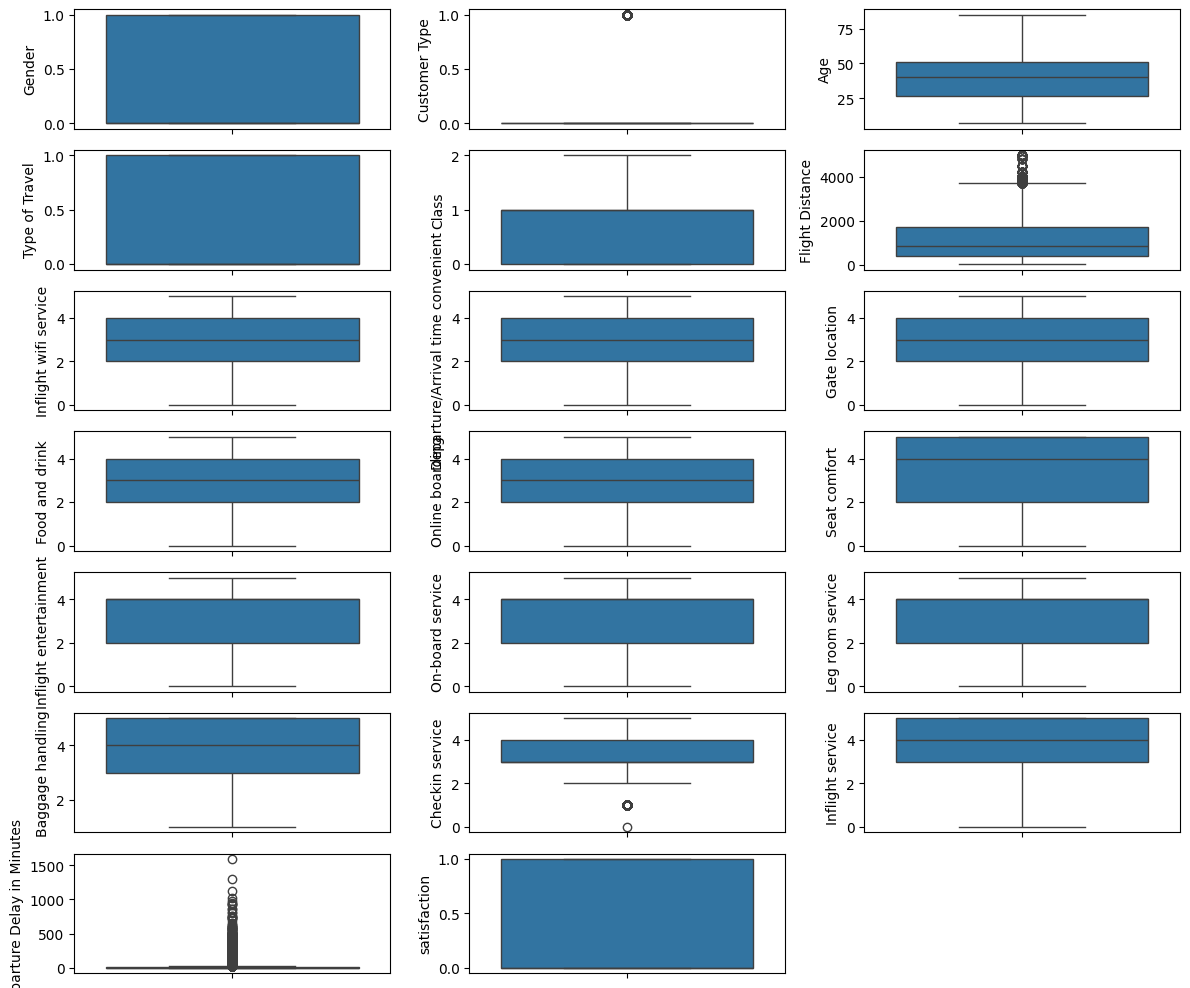

In [24]:
x = 1
plt.figure(figsize=(12, 10))
for col in df:
    plt.subplot(7, 3, x)
    sns.boxplot(df[col])
    x += 1

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
#this data have many skew and outlier

#check unbalance

In [25]:
df['satisfaction'].value_counts()

,count
satisfaction,
0,73452
1,56428


<Axes: xlabel='satisfaction', ylabel='count'>

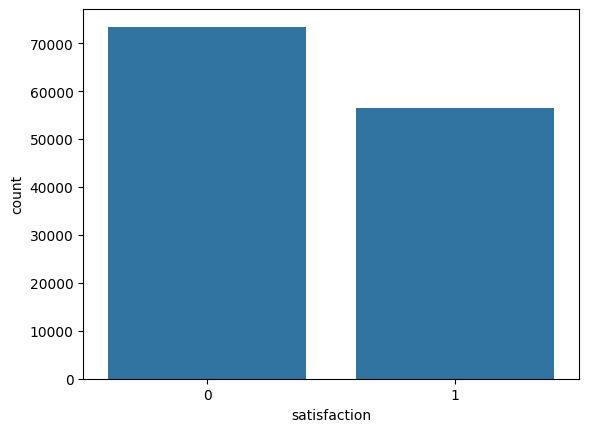

In [26]:
sns.countplot(x='satisfaction',data=df)

#Handle unbalance

In [27]:
x=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [28]:
smote=SMOTE(k_neighbors=5,random_state=42)
x_res,y_res=smote.fit_resample(x,y)

In [29]:
y_res.value_counts()

,count
satisfaction,
0,73452
1,73452


#split data

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.24,random_state=42)

#handle skew

In [31]:
pt=PowerTransformer(method='yeo-johnson')#use powertransformer to handle right and left skew , log handle right only
x_train_sk=pt.fit_transform(x_train)
x_valid_sk=pt.transform(x_valid)
x_test_sk=pt.transform(x_test)

## Scale Features

In [32]:
scaler=RobustScaler()
x_train_sc=scaler.fit_transform(x_train_sk)
x_valid_sc=scaler.transform(x_valid_sk)
x_test_sc=scaler.transform(x_test_sk)

#Logistic

In [33]:
log_model=LogisticRegression()

params={
    'solver':['liblinear','sag','saga'],
    'max_iter':[1000, 5000, 10000],
     'C':[0.1,1,10]

}

grid=GridSearchCV(
    estimator=log_model,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

grid.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [1000, 5000, 10000],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [34]:
grid.best_params_

{'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}

In [35]:
final_model_log=grid.best_estimator_

In [36]:
y_tr_pred=final_model_log.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

0.8702400450404341

In [37]:
y_val_pred=final_model_log.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)

0.8767423014586709

#EVALUATION

In [38]:
y_pred=final_model_log.predict(x_test_sc)

In [39]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
log_acc=accuracy_score(y_test,y_pred)


0.8753403521510256
0.867536468243182
0.8816758747697975


In [40]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[19428,  2570],
       [ 2924, 19150]])

<Axes: >

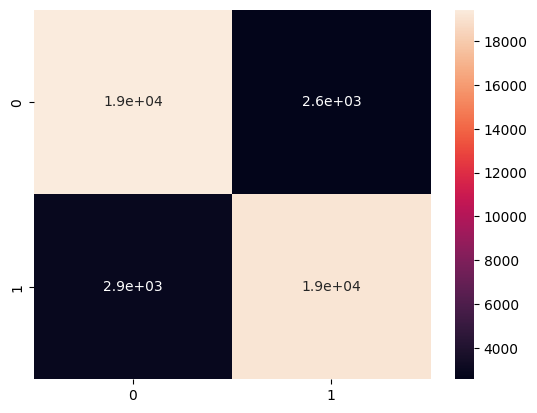

In [41]:
sns.heatmap(cof,annot=True)

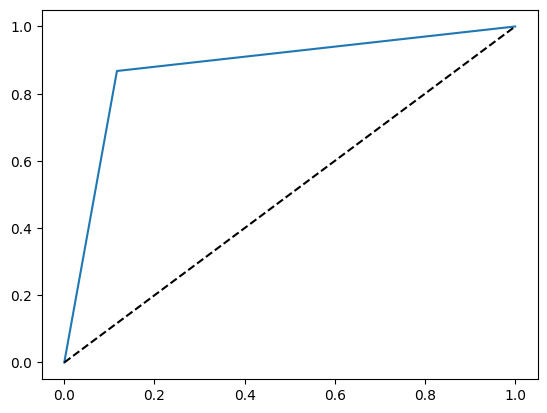

In [42]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

#dimension reduction

In [43]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(x_train_sc)
X_test_pca = pca.transform(x_test_sc)
X_valid_pca = pca.transform(x_valid_sc)

In [44]:
model_log_dim=LogisticRegression(C= 0.1, max_iter=1000, solver= 'liblinear')
model_log_dim.fit(X_train_pca, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [45]:
y_tr_pred=model_log_dim.predict(X_train_pca)
accuracy_score(y_train,y_tr_pred)

0.8577259699048009

In [46]:
y_val_pred=model_log_dim.predict(X_valid_pca)
accuracy_score(y_valid,y_val_pred)

0.8634116693679093

# SVM

In [47]:
model_svc=SVC()
model_svc.fit(x_train_sc,y_train)

SVC()

In [48]:
y_tr_pred=model_svc.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

0.9477684512232573

In [49]:
y_val_pred=model_svc.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)


0.9486628849270664

# Evaluation

In [50]:
y_pred=model_svc.predict(x_test_sc)

In [51]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
SVC_acc=accuracy_score(y_test,y_pred)


0.9463605009983663
0.936531666213645
0.9554908485856906


In [52]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[21035,   963],
       [ 1401, 20673]])

<Axes: >

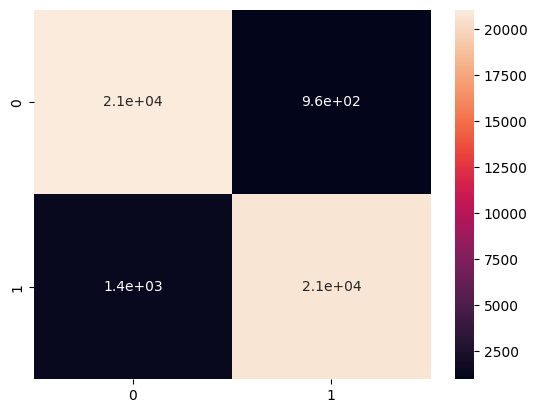

In [53]:
sns.heatmap(cof,annot=True)

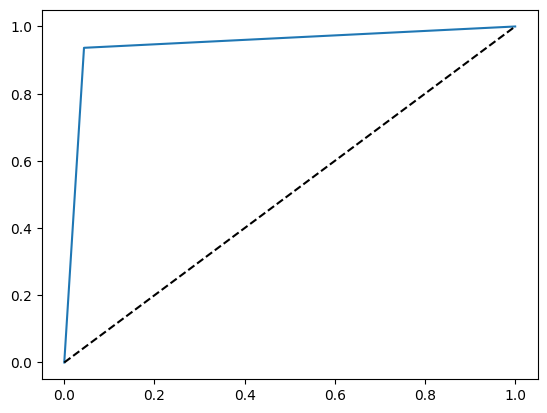

In [54]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

# KNN

In [55]:
model_knn=KNeighborsClassifier()
params={
    'n_neighbors':[3,5,7,9,11],
    'p':[1,2]
}

rand=RandomizedSearchCV(
    estimator=model_knn,
    param_distributions=params,
    scoring='accuracy',
    cv=5
)
rand.fit(x_train_sc,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2]},
                   scoring='accuracy')

In [56]:
model_knn=rand.best_estimator_

In [57]:
y_tr_pred=model_knn.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

0.941524209233289

In [58]:
y_val_pred=model_knn.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)

0.928484602917342

# Evaluation

In [59]:
y_pred=model_knn.predict(x_test_sc)

In [60]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
knn_acc=accuracy_score(y_test,y_pred)


0.9273461608277365
0.8992932862190812
0.9530004800768123


In [61]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[21019,   979],
       [ 2223, 19851]])

<Axes: >

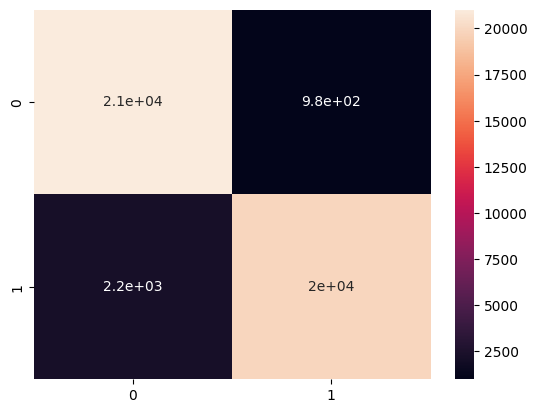

In [62]:
sns.heatmap(cof,annot=True)

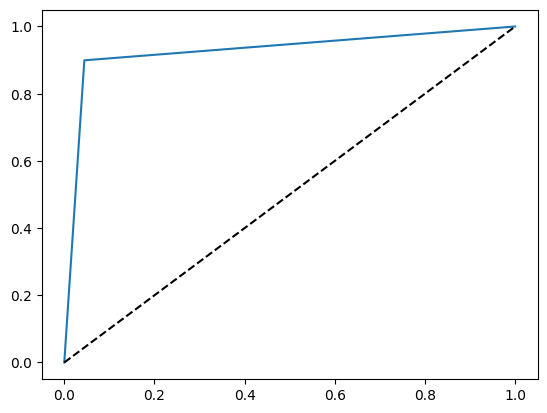

In [63]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

# Decision Tree

In [65]:
model_dt=DecisionTreeClassifier()

params={
    'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10],
    'ccp_alpha':[.001,.002,.003,.004]
}

rand=RandomizedSearchCV(
    estimator=model_dt,
    param_distributions=params,
    scoring='accuracy',
    cv=5
)

rand.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': [0.001, 0.002, 0.003,
                                                      0.004],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
                   scoring='accuracy')

In [66]:
model_dt=grid.best_estimator_

In [67]:
y_tr_pred=model_dt.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

0.8702400450404341

In [68]:
y_val_pred=model_dt.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)

0.8767423014586709

# Evaluation

In [104]:
y_pred=model_dt.predict(x_test_sc)

In [105]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
dt_acc=accuracy_score(y_test,y_pred)


0.8753403521510256
0.867536468243182
0.8816758747697975


In [106]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[19428,  2570],
       [ 2924, 19150]])

<Axes: >

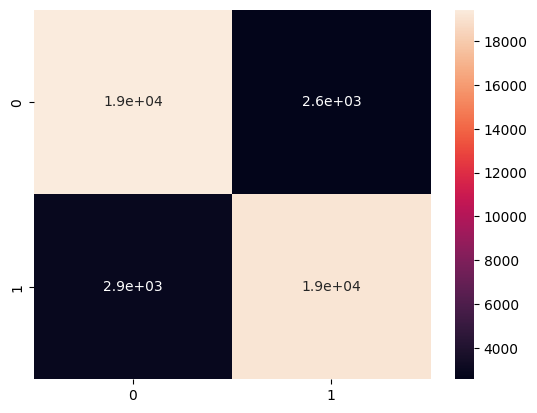

In [107]:
sns.heatmap(cof,annot=True)

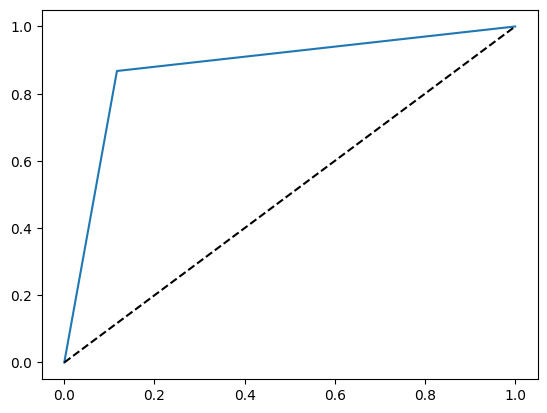

In [108]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

# Bagging

In [69]:
estimators=[('log_reg',LogisticRegression())  , ('DT',DecisionTreeClassifier()) ]

In [70]:
voting_clf=VotingClassifier(estimators=estimators,voting='soft')

In [71]:
clf3=BaggingClassifier(
    estimator=voting_clf,
    n_estimators=50,
    random_state=42

)

In [72]:
clf3.fit(x_train_sc,y_train)

BaggingClassifier(estimator=VotingClassifier(estimators=[('log_reg',
                                                          LogisticRegression()),
                                                         ('DT',
                                                          DecisionTreeClassifier())],
                                             voting='soft'),
                  n_estimators=50, random_state=42)

In [73]:
y_tr_pred=clf3.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

0.9785546115262566

In [74]:
y_val_pred=clf3.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)

0.953322528363047

#Feature Selection

In [75]:
fsm=SelectKBest(mutual_info_classif,k=18)
fsm.fit(x_train_sc,y_train)
x_train_selected=fsm.transform(x_train_sc)
x_test_selected=fsm.transform(x_test_sc)
x_valid_selected=fsm.transform(x_valid_sc)


In [76]:
clf3.fit(x_train_selected, y_train)

BaggingClassifier(estimator=VotingClassifier(estimators=[('log_reg',
                                                          LogisticRegression()),
                                                         ('DT',
                                                          DecisionTreeClassifier())],
                                             voting='soft'),
                  n_estimators=50, random_state=42)

In [77]:
y_tr_pred=clf3.predict(x_train_selected)
accuracy_score(y_train,y_tr_pred)

0.9781707441908076

In [78]:
y_val_pred=clf3.predict(x_valid_selected)
accuracy_score(y_valid,y_val_pred)

0.9525931928687196

#EVALUATION

In [79]:
y_pred=clf3.predict(x_test_selected)

In [80]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
Bagging_acc=accuracy_score(y_test,y_pred)


0.9531675440188782
0.9453655884751291
0.9605081469207402


In [81]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[21140,   858],
       [ 1206, 20868]])

<Axes: >

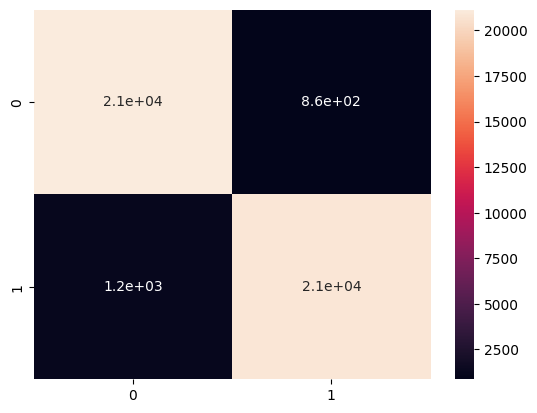

In [82]:
sns.heatmap(cof,annot=True)

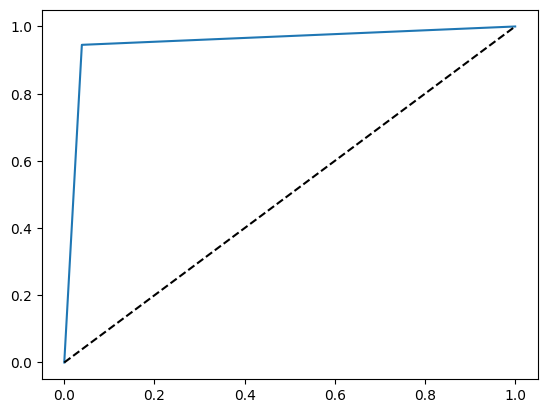

In [83]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

# Random Forest

In [84]:
RF=RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


In [85]:
RF.fit(x_train_sc,y_train)

RandomForestClassifier(random_state=42)

In [86]:
y_tr_pred=RF.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

1.0

In [87]:
y_val_pred=RF.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)

0.9606564019448947

# Cross Validation

In [88]:
stratfied_cross=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(RF,x_train_sc,y_train,cv=stratfied_cross)
print(scores)
scores.mean()


[0.95316998 0.95566502 0.95854127 0.96097249 0.95591811]


0.9568533738322795

# Evaluation

In [89]:
y_pred=RF.predict(x_test_sc)

In [90]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
RF_acc=accuracy_score(y_test,y_pred)


0.9590669813033218
0.9462263296185558
0.9713076636904762


In [91]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[21381,   617],
       [ 1187, 20887]])

<Axes: >

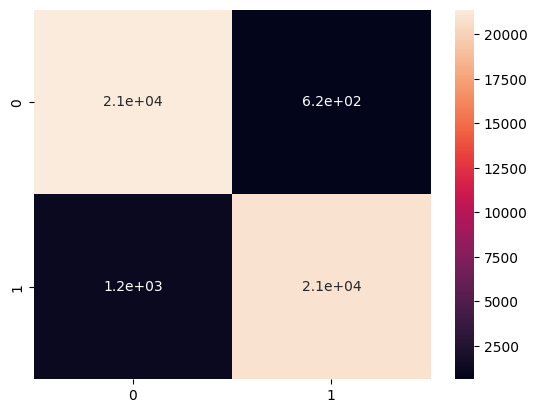

In [92]:
sns.heatmap(cof,annot=True)

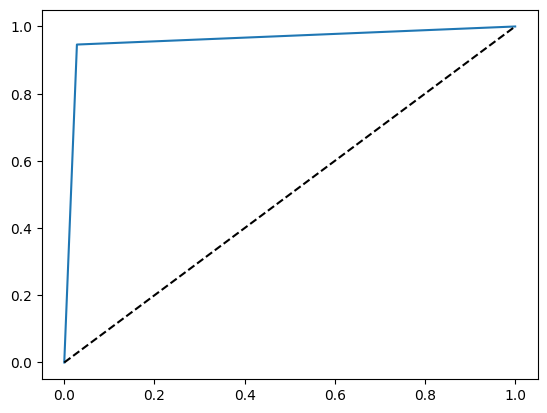

In [93]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

# Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
model=GradientBoostingClassifier(
    n_estimators=700,
    learning_rate=.3,
    random_state=42
)

In [96]:
model.fit(x_train_sc,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=700, random_state=42)

In [97]:
y_tr_pred=model.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

0.9697256628109325

In [98]:
y_val_pred=model.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)

0.9584278768233387

# Evaluation

In [99]:
y_pred=model.predict(x_test_sc)

In [100]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
boosting_acc=accuracy_score(y_test,y_pred)


0.9571383191141768
0.9481290205671831
0.9656715729248374


In [101]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[21254,   744],
       [ 1145, 20929]])

<Axes: >

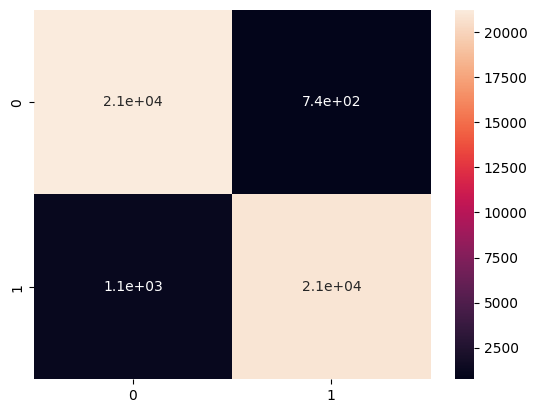

In [102]:
sns.heatmap(cof,annot=True)

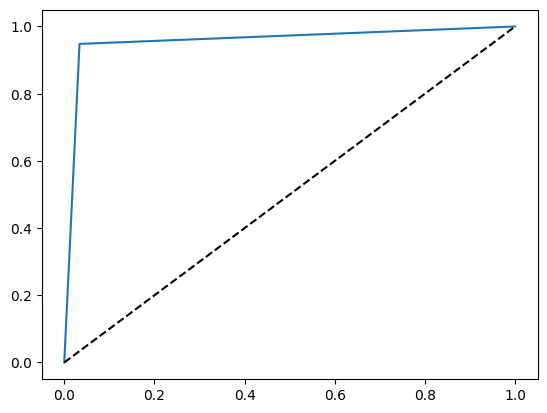

In [103]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

# Adaboost

In [113]:
Ada_boost=AdaBoostClassifier(
    n_estimators=500,
    learning_rate=.5 ,
    random_state=42
)

In [114]:
Ada_boost.fit(x_train_sc, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=42)

In [115]:
y_tr_pred=Ada_boost.predict(x_train_sc)
accuracy_score(y_train,y_tr_pred)

0.925427372300133

In [116]:
y_val_pred=Ada_boost.predict(x_valid_sc)
accuracy_score(y_valid,y_val_pred)

0.9270664505672609

# Evaluation

In [117]:
y_pred=Ada_boost.predict(x_test_sc)

In [118]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
Ada_boost_acc=accuracy_score(y_test,y_pred)


0.9258713015066256
0.9209024191356346
0.9303858300151037


In [119]:
cof=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[20477,  1521],
       [ 1746, 20328]])

<Axes: >

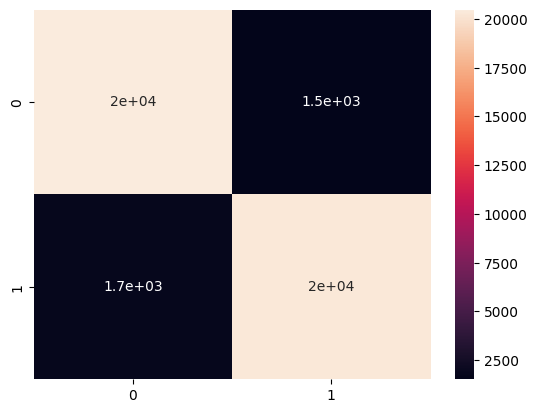

In [120]:
sns.heatmap(cof,annot=True)

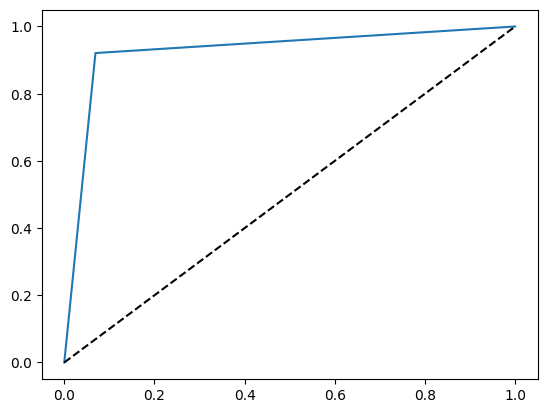

In [121]:
FPR,TPR,THE=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

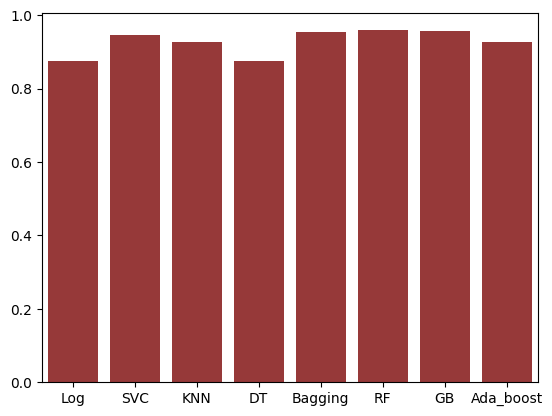

In [125]:
model=['Log','SVC','KNN','DT','Bagging','RF','GB','Ada_boost']
acc=[log_acc,SVC_acc,knn_acc,dt_acc,Bagging_acc,RF_acc,boosting_acc,Ada_boost_acc]
sns.barplot(x=model,y=acc,color='Brown')
plt.show()